<a href="https://colab.research.google.com/github/PikasXYZ/Multi-Functional_LINE_Notify_BOT/blob/main/SendMessageByLINENotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import & Function

In [ ]:
#@title Import
from google.colab import drive, files
from IPython.display import Image, display, clear_output
from time import sleep, localtime
from ipywidgets import widgets
import requests
import os

In [ ]:
#@title LINE Notify
def LineNotify(token, msg = '', img_dir = '', stickerPackageId = None, stickerId = None):
    headers = {"Authorization": "Bearer " + token} #token = API token of LINE Notify
    params = {
        'message': '\n' + msg,
        'stickerPackageId' : stickerPackageId, #stickerPackageId、stickerId (ref : Line Sticker List)
        'stickerId' : stickerId
    }
    files = {'imageFile': open(img_dir, 'rb') if img_dir else None} #img to send

    r = requests.post("https://notify-api.line.me/api/notify", headers = headers, params = params, files = files)
    status = {
          200: "Succeed!",
          400: "Bad request",
          401: "Invalid access token",
          500: "Failure due to server error"
          } 
    print(f"\nstatus code : {r.status_code} (", status[r.status_code] if r.status_code in status.keys() else "Processed over time or stopped",")", end = "")

In [ ]:
#@title Interruption Preventing
%%javascript
function ClickConnect(){
  console.log("Working");
  document
  .querySelector("#top-toolbar > colab-connect-button")
  .shadowRoot
  .querySelector("#connect")
  .click()
}

setInterval(ClickConnect,60000)

<IPython.core.display.Javascript object>

#Preprocessing

In [ ]:
#@title Get LINE Notify API tokens
#@markdown #####Here you can change the id and the API key (.json file) of Google Sheet or the path of txt, where LINE Notify API tokens are stored.
#@markdown ##### ㅤ
txt_path = "/content/drive/MyDrive/LineNotifyTokens.txt" #@param {type:"string"}
GSheet_path = "/content/drive/MyDrive/GSheet.json" #@param {type:"string"}
sheet_id = "1GXjljdCh0tZ7xjgumzlj68iKdb8BG78P1VBFsaO-TQY" #@param {type:"string"}
#@markdown ##### ㅤ
#@markdown #####If you don't wanna provide LINE Notify API tokens from Google Drive, you can just key in an usable one below. (Otherwise, **PLEASE KEEP THERE EMPTY TO AVOID ERROR.**)
#@markdown ##### ㅤ
LINE_Notify_API_token = "" #@param {type:"string"}

if LINE_Notify_API_token:
  tokens = {"LINE_Notify_API_token":LINE_Notify_API_token}

else:
  #Conneect to Google Drive
  drive.mount('/content/drive')

  #Get LINE Notify API tokens from certain txt in Google Drive 
  if os.path.exists(txt_path):
    with open(txt_path, "r") as f:
      tokens = {rl.split("\t")[0] : rl.split("\t")[1].strip() for rl in f.readlines()}
  
  else:
    
    #Get Google Sheets API Authorization
    print("\nInstalling neccesaries...")
    !pip install -q gspread 
    !pip install -q oauth2client
    import gspread
    from oauth2client.service_account import ServiceAccountCredentials as SAC

    scopes = ["https://spreadsheets.google.com/feeds"]
    credentials = SAC.from_json_keyfile_name(GSheet_path, scopes) #key location
    client = gspread.authorize(credentials)
    sheet = client.open_by_key(sheet_id) #The longest garbled character in the URL of Google Sheet
    sheet = sheet.sheet1 #sheet name
    data = sheet.get_all_values()
    tokens = {row[0]: row[1] for row in data}

if tokens:
  print("Found tokens sucessfullly!")
else:
  raise FileNotFoundError(f"Cannot find tokens QAQ, plz check {txt_path} or Google sheet of the sheet id.")

Mounted at /content/drive
Found tokens sucessfullly!


#Send Message

In [ ]:
#@title Tokens
for idx,key in enumerate(tokens.keys()):
  print(f"No.{idx+1} : {key} (value = {tokens[key][:10]}...)")
#@markdown ####Choose the token number you want to send messeage with:
#@markdown ##### ㅤ
token_number = 1 #@param {type:'integer'}
token = tokens[list(tokens.keys())[token_number-1]]
#@markdown ##### ㅤ
#@markdown #####P.S. There're the numbers of your tokens and their names below.

No.1 : self (value = slCmVvfLn8...)
No.2 : boss (value = kSeZEcnPeW...)
No.3 : Xray (value = s3UaBhOA5K...)


In [ ]:
#@title Set Message to Send
#@markdown ####Enter a message to send:
#@markdown ##### ㅤ
message = "Never gonna give you up ~ " #@param {type:'string'}
#@markdown ##### ㅤ 
#@markdown ####Tick `add_sticker` and fill in `sticker_package_id` & `sticker_id` if you wanna send a sticker with your message.
#@markdown #####ㅤP.S. You can find sticker package id & sticker id in [this website](https://developers.line.biz/en/docs/messaging-api/sticker-list/#sticker-definitions)  
#@markdown #####ㅤ
add_sticker = False #@param {type:'boolean'}
if add_sticker:
  sticker_package_id = 8522 #@param {type:'integer'}
  sticker_id = 16581267 #@param {type:'integer'}

The image of https://avatars.githubusercontent.com/u/120371636?v=4 was saved as 'upload.jpg'.

Image name :  upload.jpg


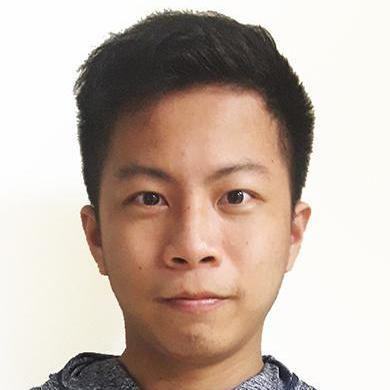

In [ ]:
#@title Set Image to Send
#@markdown #####Choose the way to provide image
way = "URL" #@param ["Upload","URL","Google Drive Path"]{type:"string"}
#@markdown #####ㅤ
#@markdown #####If you choose **URL**, please provide image URL in `image_url`
#@markdown #####ㅤ
image_url = "https://avatars.githubusercontent.com/u/120371636?v=4" #@param {type:"string"}
#@markdown #####ㅤ
#@markdown #####If you choose **Google Drive Path**, please provide image Google Drive Path in `Google_Drive_Path`
#@markdown #####ㅤ
Google_Drive_Path = "" #@param {type:"string"}
#@markdown #####ㅤ
#@markdown #####If you choose **Upload**, please upload image(s) after running this cell. 
#@markdown #####ㅤ
if way == "Upload":
  uploaded = files.upload()
  images = [name for name, data in uploaded.items()]
  print("Upload successfully!")

elif way == "URL":
  response = requests.get(image_url)
  if response.status_code == 200:
    with open('upload.jpg', 'wb') as f:
        f.write(response.content)
    images = ['upload.jpg']
    print(f"The image of {image_url} was saved as 'upload.jpg'.")
  else:
    print(f"The image of {image_url} is invalid, error code：{response.status_code}")
  
elif way == "Google Drive Path":
  #Conneect to Google Drive
  drive.mount('/content/drive')
  if os.path.exists(Google_Drive_Path):
    print("Image found!")
    images = [Google_Drive_Path]
  else:
    raise FileNotFoundError("Image not found!")

for image in images:
  print("\nImage name : ", image)
  display(Image(image))
  

In [ ]:
#@title Set When to Send
#@markdown ####Tick `send_at_the_appointed_time` and set when to send if you don't wanna send message now.
#@markdown #####ㅤ
send_at_the_appointed_time = False #@param {type:'boolean'}
if send_at_the_appointed_time:
  day = "2023-03-19" #@param {type:'date'}
  y, m, d = (int(i) for i in day.split("-"))
  hour = 12 #@param {type:"slider", min:0, max:23, step:1}
  min = 31 #@param {type:"slider", min:0, max:59, step:1}

In [ ]:
#@title Send Message!

def SendMessage():
  if send_at_the_appointed_time:
    while(localtime().tm_year != y or localtime().tm_mon != m or localtime().tm_mday != d or localtime().tm_hour + 8 != hour or localtime().tm_min != min): #break if time's up
      clear_output(wait = True)
      print(f"Appointed Time : {y}/{m:>2}/{d:>2}\t{hour:>2}:{min:0>2}")
      print(f"Current Time   : {localtime().tm_year}/{localtime().tm_mon:>2}/{localtime().tm_mday:>2}\t{localtime().tm_hour+8:>2}:{localtime().tm_min:0>2}:{localtime().tm_sec:0>2}")
      sleep(1) #resting 1 sec for every loop
      
  LineNotify(token, message, stickerPackageId = sticker_package_id if add_sticker else None, stickerId = sticker_id if add_sticker else None)

  for image in images:
    LineNotify(token, image, img_dir = image)

button = widgets.Button(description='Send!')
button.on_click(lambda x: SendMessage())
display(button)

Button(description='Send!', style=ButtonStyle())